## COMMENT CLASSIFICATION

In [23]:
##Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud 

In [3]:
df_train=pd.read_csv(r"C:\Users\shaik mahaboob basha\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv")
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df_test=pd.read_csv(r"C:\Users\shaik mahaboob basha\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv")
df_test.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


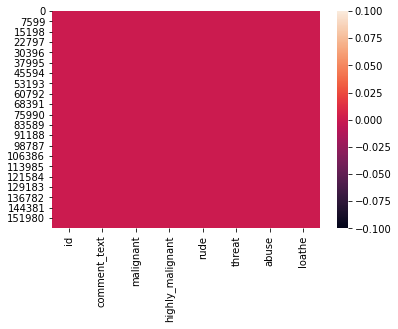

In [6]:
# checking null values
print(df_train.isnull().sum())
print(sns.heatmap(df_train.isnull()))

AxesSubplot(0.125,0.125;0.62x0.755)


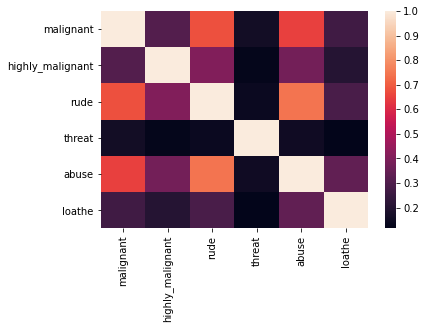

In [8]:
#checking correlation 
print(sns.heatmap(train.corr()))

In [9]:
# checking the skewness for the features:
df_train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


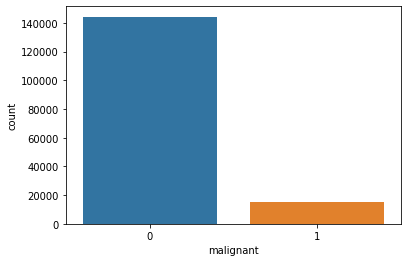

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


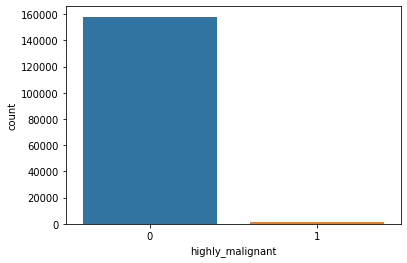

loathe


0    158166
1      1405
Name: loathe, dtype: int64


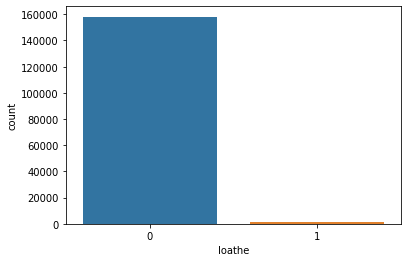

rude


0    151122
1      8449
Name: rude, dtype: int64


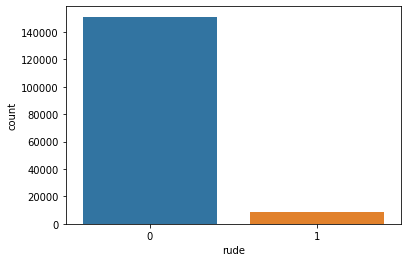

abuse


0    151694
1      7877
Name: abuse, dtype: int64


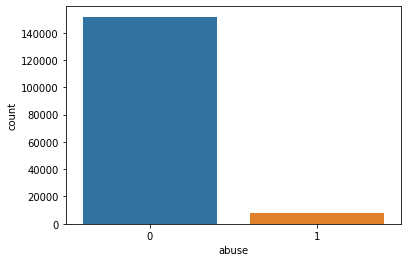

threat


0    159093
1       478
Name: threat, dtype: int64


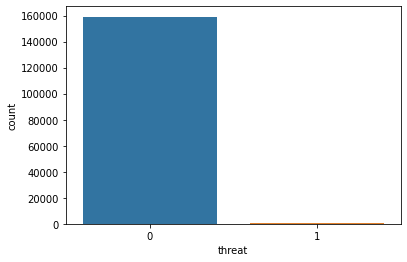

In [13]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(df_train[i].value_counts())
    sns.countplot(df_train[i])
    plt.show()

In [14]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\shaik mahaboob
[nltk_data]     basha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
df_train['length'] = df_train['comment_text'].str.len()
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [17]:
# Convert all messages to lower case
df_train['comment_text'] = df_train['comment_text'].str.lower()

# Replace email addresses with 'email'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_train['comment_text'] = df_train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [18]:
df_train['clean_length'] = df_train.comment_text.str.len()
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [19]:
# Total length removal
print ('Origin Length', df_train.length.sum())
print ('Clean Length', df_train.clean_length.sum())

Origin Length 62893130
Clean Length 43575187


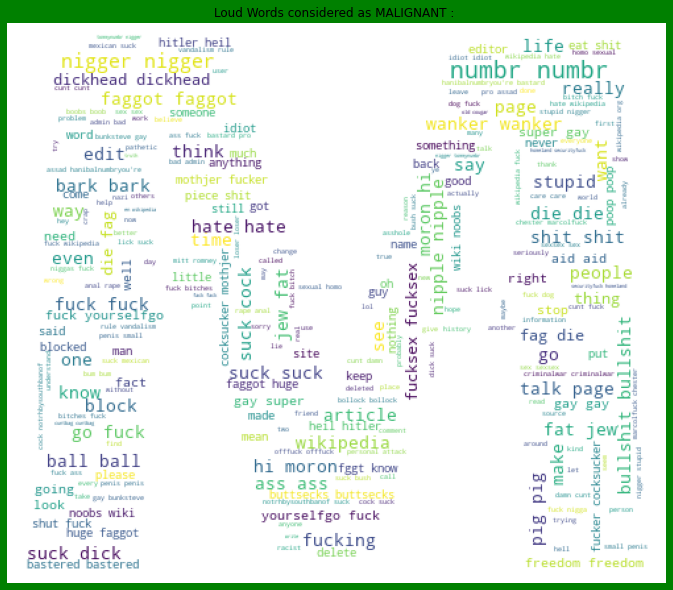

In [24]:
MM = np.array(Image.open(r'C:\Users\shaik mahaboob basha\Downloads\m.jpg'))
text =  df_train['comment_text'][df_train['malignant']==1]

wordcloud = WordCloud(background_color='white',  
                      height=250,
                      width=500, 
                      max_words = 250,
                      mask=MM #  add a mask 
                     ).generate(' '.join(text))
plt.figure(figsize=[25, 8], facecolor='g')
plt.title("Loud Words considered as MALIGNANT : ")
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


#Getting sense of loud words which are offensive


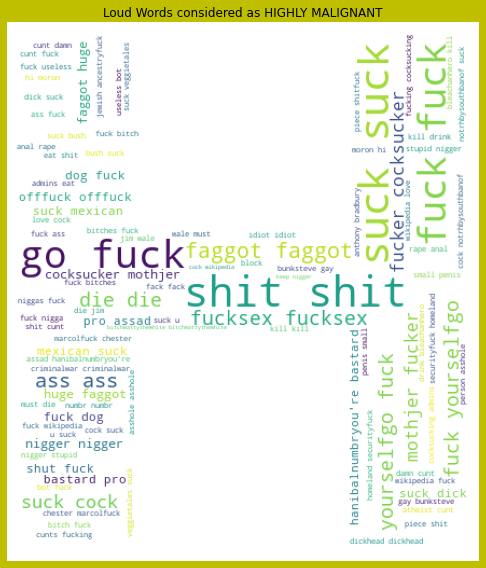

In [26]:
HMM = np.array(Image.open(r'C:\Users\shaik mahaboob basha\Downloads\h.jpg'))
text =  df_train['comment_text'][df_train['highly_malignant']==1]

wordcloud = WordCloud(background_color='white',  
                      height=100, 
                      width=400, 
                      max_words = 100,
                      mask=HMM  
                     ).generate(' '.join(text))
plt.figure(figsize=[30, 8], facecolor='y')
plt.title("Loud Words considered as HIGHLY MALIGNANT")

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

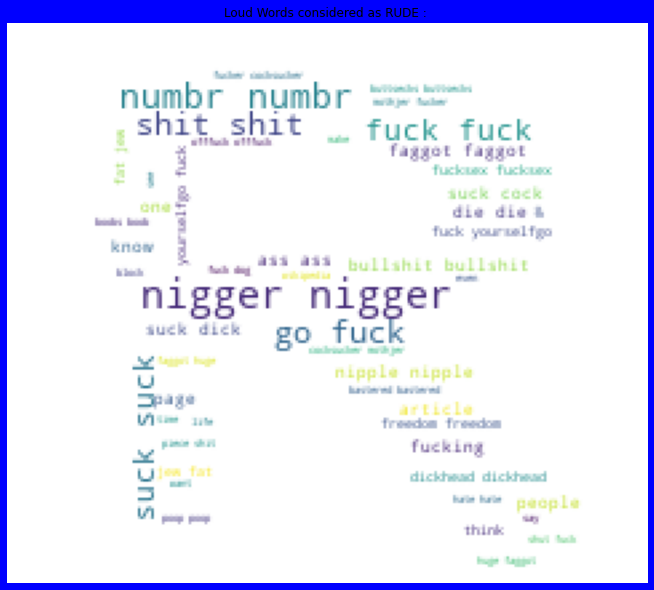

In [27]:
rm = np.array(Image.open(r'C:\Users\shaik mahaboob basha\Downloads\R.jpg'))
text =  df_train['comment_text'][df_train['rude']==1]

wordcloud = WordCloud(background_color='white', #  the background color is white 
                      height=400, #  the height is set to 400 
                      width=800, #  set the width to 800 
                      max_words = 150,
                      mask=rm #  add a mask 
                     ).generate(' '.join(text))
plt.figure(figsize=[25, 8], facecolor='b')
plt.title("Loud Words considered as RUDE : ")
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

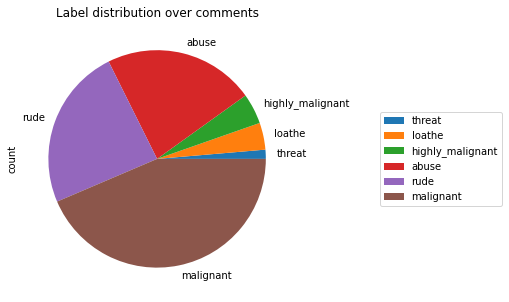

In [29]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = df_train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [35]:
target_data = df_train[cols_target]

df_train['bad'] =df_train[cols_target].sum(axis =1)
print(df_train['bad'].value_counts())
df_train['bad'] = df_train['bad'] > 0 
df_train['bad'] = df_train['bad'].astype(int)
print(df_train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [30]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [31]:
df_train.shape

(159571, 8)

In [33]:
df_test.shape

(159571, 8)

In [36]:
y=df_train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [37]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [39]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9595251524185534
Test accuracy is 0.9552974598930482
[[42733   217]
 [ 1923  2999]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [40]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)

y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9990420684160108
Test accuracy is 0.9420120320855615
[[41658  1292]
 [ 1484  3438]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42950
           1       0.73      0.70      0.71      4922

    accuracy                           0.94     47872
   macro avg       0.85      0.83      0.84     47872
weighted avg       0.94      0.94      0.94     47872



In [41]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)

y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9990331157843848
Test accuracy is 0.9563419117647058
[[42409   541]
 [ 1549  3373]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.69      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.84      0.87     47872
weighted avg       0.95      0.96      0.95     47872



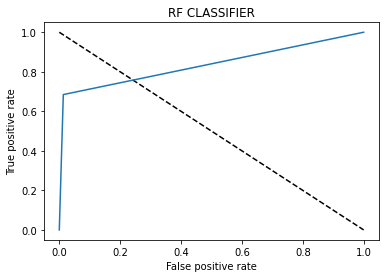

In [45]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [50]:
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 15)  #random forest
# will give you top 15 features or words  which makes a comment toxic

Weight,Feature
0.0762 ± 0.0594,fuck
0.0404 ± 0.0459,fucking
0.0271 ± 0.0296,shit
0.0192 ± 0.0213,ass
0.0181 ± 0.0127,stupid
0.0178 ± 0.0106,idiot
0.0173 ± 0.0165,suck
0.0172 ± 0.0197,bitch
0.0157 ± 0.0139,asshole
0.0115 ± 0.0115,dick


In [52]:
test_data =tf_vec.fit_transform(df_test['comment_text'])
test_data

<159571x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3530738 stored elements in Compressed Sparse Row format>

In [53]:
prediction=RF.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
import joblib
joblib.dump(RF,"mcc.pkl")

['mcc.pkl']